In [2]:
import os
from functools import reduce
import numpy as np
import pandas as pd
import cooler

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import seaborn as sns
sns.set_context('paper', rc={'font.size':14, 'axes.titlesize':14,'axes.labelsize':14, 'xtick.labelsize':14, 'ytick.labelsize':14})

mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif']=['Arial']

In [3]:
def get_profile(filename):
    df = pd.read_csv(filename,comment='@', sep='\t',header=None).fillna(0)
    df.set_index(list(range(0,6)), inplace=True) 
    return df.sum().values

In [27]:
### read data

TFs = [ 'CTCF', 'IRF4','MEF2C', 'MYC', 'RELA', 'REST', 'SPI1', 'YY1' ]

methods = ['scMicro-C', 'Micro-C', 'Dip-C', 'Hi-C']

ligation_junction_data = {    
    'Dip-C': { TF: get_profile(f'matrix/dipc_clean_ligation_junction.{TF}.matrix.gz') for TF in TFs},
    'Hi-C': { TF: get_profile(f'matrix/4DNFIR4LSSNY_ligation_junction_counts.{TF}.matrix.gz') for TF in TFs },
    'Micro-C': { TF: get_profile(f'matrix/150U_Rep5_sorted_ligation_junction.{TF}.matrix.gz') for TF in TFs },
    'scMicro-C': { TF: get_profile(f'matrix/clean_ligation_junction_sorted.{TF}.matrix.gz') for TF in TFs }
}

### <font color='blue'>Ensemble footprints</font>

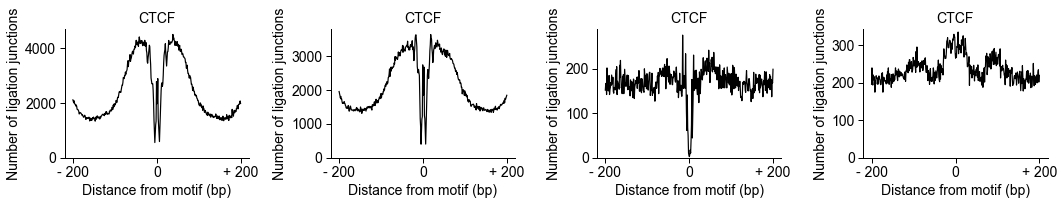

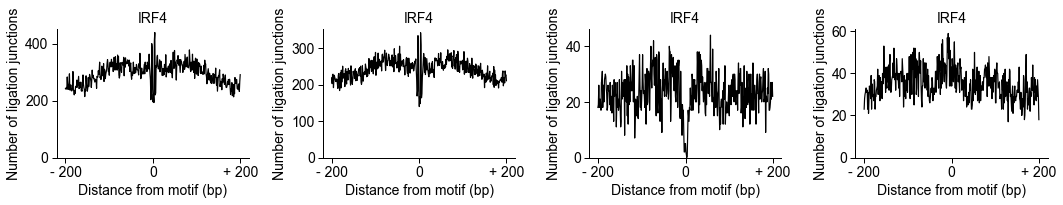

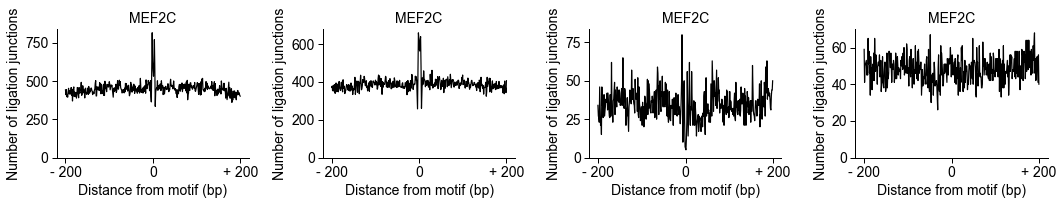

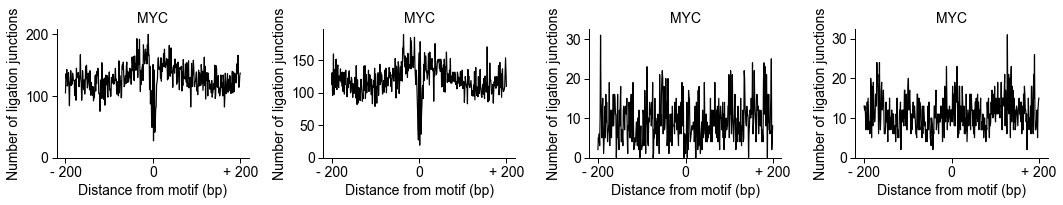

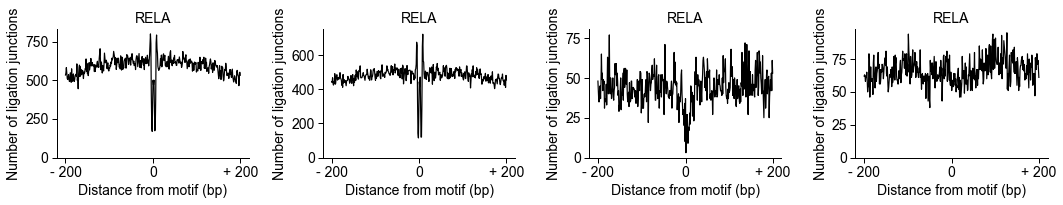

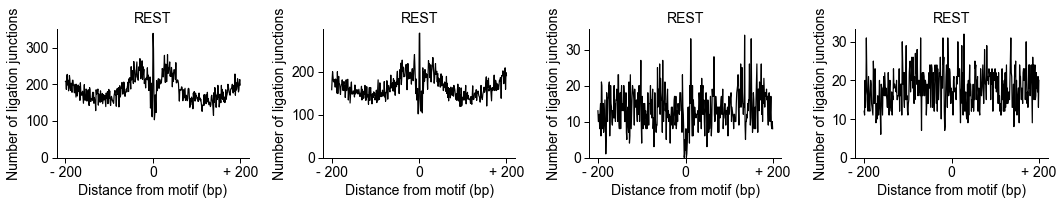

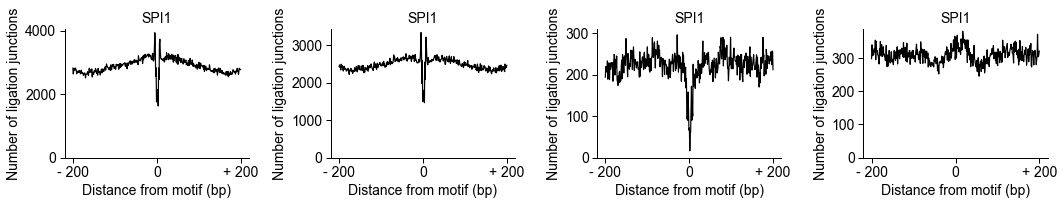

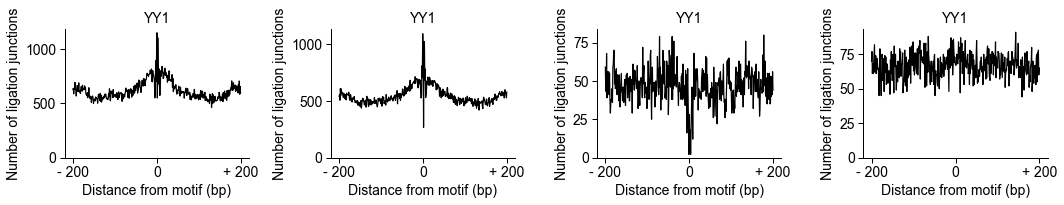

In [10]:
pdf = PdfPages('footprints_using_ligation_junctions_ensemble.pdf')

for TF in TFs:
    f, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,3))
    for i in range(4):
        
        ax = axs[i]
        col = methods[i]
        ax.plot(ligation_junction_data[col][TF], color='k')
        sns.despine()
        _ = ax.set(
            xlabel='Distance from motif (bp)', 
            ylabel='Number of ligation junctions', 
            xticks=[0, 200, 399],
            xticklabels=['- 200', '0', '+ 200'],
            title=TF
        
        )
        _ = ax.set_ylim(ymin=0)
    plt.tight_layout()
    pdf.savefig()
    
pdf.close()

### <font color='blue'>Single cell footprints</font>

In [4]:
this_study = {
    'Cell 27': get_profile('matrix/cell_027_clean_ligation_junction_pileup.CTCF.matrix.gz'),
    'Cell 49': get_profile('matrix/cell_049_clean_ligation_junction_pileup.CTCF.matrix.gz'),
    'Cell 55': get_profile('matrix/cell_056_clean_ligation_junction_pileup.CTCF.matrix.gz')   
}

dipc = {
    'Cell 9': get_profile('matrix/GM12878_09_clean_ligation_junction_pileup.CTCF.matrix.gz'),
    'Cell 14': get_profile('matrix/GM12878_14_clean_ligation_junction_pileup.CTCF.matrix.gz'),
    'Cell 17': get_profile('matrix/GM12878_17_clean_ligation_junction_pileup.CTCF.matrix.gz'),
}

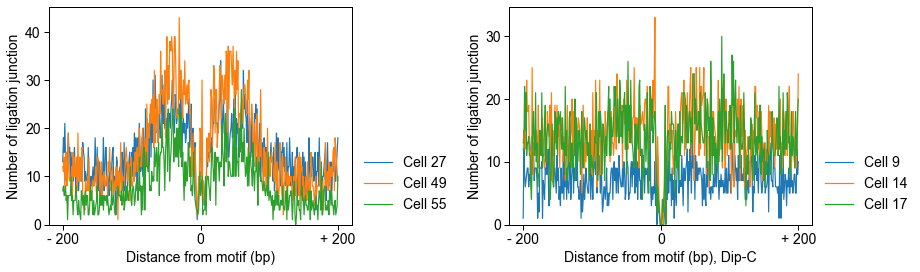

In [5]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

ax = axs[0]
for key, value in this_study.items():
    ax.plot(value, label=key)
    _ = ax.set(
        xlabel='Distance from motif (bp)',  ylabel='Number of ligation junction', 
        xticks=[0, 200, 399], xticklabels=['- 200', '0', '+ 200']
    )
_ = ax.set_ylim(ymin=0)
_ = ax.legend(fontsize=14, frameon=False, bbox_to_anchor=(1,0), loc='lower left')

ax = axs[1]
for key, value in dipc.items():
    ax.plot(value, label=key)
    _ = ax.set(
        xlabel='Distance from motif (bp), Dip-C',  ylabel='Number of ligation junction', 
        xticks=[0, 200, 399], xticklabels=['- 200', '0', '+ 200'],
        yticks=[0, 10, 20, 30]
    )
_ = ax.set_ylim(ymin=0)
_ = ax.legend(fontsize=14, frameon=False, bbox_to_anchor=(1,0), loc='lower left')

plt.tight_layout()
plt.savefig('footprints_using_ligation_junctions_SC.pdf')